WISO100303 / Johannes Schmidt & Peter Regner

# **An introduction to scientific programming**

<br> <br> <br> <br><br> <br> <br> <br>

# Recap from last lecture

- use Google Colab to execute Python code
- use Python as calculator
- how to display text or values using `print()`
- assign values to variables
- call functions and write functions
- if statements

# Recap: Functions and variables

## Variable assignments

Variables allow us to assign a symbolic name to a value and reuse it:

In [7]:
x = 1
print(x)

1


The value stored in a variable can be changed:

In [8]:
x = x + 1
print(x)

2


`=` is used for assignment, `==` is used for the equality sign:

In [9]:
x == 2

True

**Hint:** Google Colab has a variable viewer (`{} Variables` in the panel at the bottom).

## Why variables and why functions? (live coding example)

From homework 1: let's calculate the volume of a snowman!

 - snow weighs 830 kg/m³
 - ball diameters: 70 cm, 42 cm, 23 cm.
 - store the result in a variable called `snowman_weight`

Recall:
$$
V = \frac{4}{3} \pi r^3 = \frac{4}{3} \pi \left(\frac{d}{2}\right)^3
$$

In [10]:
import numpy as np

Let's start with a working solution:

In [11]:
snowman_weight = (4 / 3 * np.pi * 0.70**3 / 8 + 4 / 3 * np.pi * 0.42**3 / 8 + 4 / 3 * np.pi * 0.23**3 / 8) * 830

In [12]:
if round(snowman_weight, 2) == 186.55:
    print("✅  Looks good!")
else:
    print("❌ something is wrong")

✅  Looks good!


In [13]:
### BEGIN SOLUTION

We could introduce names for all the parameters, by storing them in variables:

In [14]:
diameter_ball1_m = 0.70
diameter_ball2_m = 0.42
diameter_ball3_m = 0.23

specific_snow_weight_kg_m3 = 830


snowman_weight = (4 / 3 * np.pi * diameter_ball1_m**3 / 8 +
                  4 / 3 * np.pi * diameter_ball2_m**3 / 8 +
                  4 / 3 * np.pi * diameter_ball3_m**3 / 8) * specific_snow_weight_kg_m3

Note that in Datalore you can use the "Extract Variable" functionality (in the menu in Code -> Refactor) to automatically introduce a new variable for the selected code.

In [15]:
if round(snowman_weight, 2) == 186.55:
    print("✅  Looks good!")

✅  Looks good!


We can further assign names to the volumes of each ball:

In [16]:
diameter_ball1_m = 0.70
diameter_ball2_m = 0.42
diameter_ball3_m = 0.23

specific_snow_weight_kg_m3 = 830

ball_volume1_m = 4 / 3 * np.pi * diameter_ball1_m**3 / 8
ball_volume2_m = 4 / 3 * np.pi * diameter_ball2_m**3 / 8
ball_volume3_m = 4 / 3 * np.pi * diameter_ball3_m**3 / 8

snowman_weight = (ball_volume1_m + ball_volume2_m + ball_volume3_m) * specific_snow_weight_kg_m3

In [17]:
if round(snowman_weight, 2) == 186.55:
    print("✅  Looks good!")

✅  Looks good!


Actually the formula could be simplified:

$$
V = \frac{4}{3} \pi r^3 = \frac{4}{3} \pi \left(\frac{d}{2}\right)^3 = \frac{1}{6} \pi d^3 
$$

But we would have to modify the change three times. This is tiresome and error-prone.

In [18]:
def ball_volume(diameter):
    return 1 / 6 * np.pi * diameter**3

diameter_ball1_m = 0.70
diameter_ball2_m = 0.42
diameter_ball3_m = 0.23

specific_snow_weight_kg_m3 = 830

total_volume = (ball_volume(diameter_ball1_m) +
                ball_volume(diameter_ball2_m) +
                ball_volume(diameter_ball3_m))

snowman_weight = total_volume * specific_snow_weight_kg_m3

In [19]:
if round(snowman_weight, 2) == 186.55:
    print("✅  Looks good!")

✅  Looks good!


In [20]:
### END SOLUTION

Techniques used here:
 - [refactoring](https://en.wikipedia.org/wiki/Code_refactoring): is the process of restructuring existing code without altering its external behavior to improve readability, maintainability, and efficiency.
 - [unit testing](https://realpython.com/python-testing/): testing individual units of code by pre-defining test cases and then running them and automatically evaluating their correctness

By the way, there is a [great video in the Youtube channel _3Blue1Brown_](https://www.youtube.com/watch?v=GNcFjFmqEc8) a sphere's surface area is four times its shadow. This is not directly related to the volume of a sphere, but I wanted to recommend the video anyway :)

## Example: Cosine

Another example:

$$
    \cos (x) = 1 - \frac{x^2}{2!} + \frac{x^4}{4!} - \frac{x^6}{6!} + \cdots = \sum_{n=0}^\infty \frac{(-1)^n x^{2n}}{(2n)!}
$$

The right-hand side shows the mathematical definition of cosine. In practice, you simply use the symbolic name $\cos (x)$ and trust your pocket calculator and its implementation of $\cos(x)$.

## Syntax of functions

- `def` in the beginning
- round parentheses `()` with a list of parameters
- a colon `:`
- a block of indented code
- optional: `return` and a return value

In [21]:
def some_function_name(parameter1, parameter2, parameter3):
    ...
    some_value = parameter1 + parameter2 + parameter3
    return some_value

input_value1 = 1
input_value2 = 2
input_value3 = 23

the_result = some_function_name(input_value1, input_value2, input_value3)

The code above is roughly (!) equivalent to the following:

In [22]:
input_value1 = 1
input_value2 = 2
input_value3 = 23

# function head:
parameter1 = input_value1
parameter2 = input_value2
parameter3 = input_value3

# function body:
some_value = parameter1 + parameter2 + parameter3

# return value:
the_result = some_value

**Note:** in the function example the variables `parameter1`, `parameter2`, `parameter3` can be only used inside the function. If a variable outside the function exists, it can be accessed inside and outside the function, unless a value is assigned to a variable with the same name inside the function or if a parameter of the function has the same name. This is called [shadowing](https://en.wikipedia.org/wiki/Variable_shadowing#Python).

Note that parentheses are used in a different way in many places. Until now we've seen round parentheses `()` in mathematical expressions and in order to define and to call functions. We will see more usages of different types of brackets, also the square brackets `[]` and the curly `{}` brackets. Angle brackets `<>` are not used as pairwise in Python, only for _less than_ or _greater than_.

# So what is "code"?

In the context of programming, _code_ or _source code_ consists of instructions for the computer and is human readable. Typically it is written in text.

Often source code is stored in text files and then executed. In our case, we store code in code cells, but the notebook format is a document format, which does not only contain pure text, but also formatting in markdown cells and the output of executed code cells (also images), similar to a word document.



In contrast to natural language (English, German, ...), these instructions must follow a precise structure defined by a _programming language_. This structure is called _syntax_.

If code does not follow the syntax of the programming language, it is not valid code and an error is raised.

**Note:** some important details of the Python syntax:
 - white spaces are important in some places - mandatory indentation for functions and if statements
 - functions always have round parentheses, also if they don't take any parameters
 - numbers are always written using a decimal dot `23.42` not using a decimal comma `23,42`
 - you can shift the comma to the left or right by appending `e` and the number of shifts: `4200 == 42e2`, `0.42 == 42e-2`
 - text requires double or single quotes: `"some text"` and `'some text'` is identical

# Different types of errors

We distinguish between:

- Syntax errors: refers to the structure of code Python can parse
- Semantics errors: refers to the meaning of the code
- Run time errors: everything else which can go wrong during execution of the code

<small>Here, with _run time errors_ we do not only mean the RuntimeError exception in Python. Think of a variable being used before a value has been assigned to it.</small>

Further reading: [Chapter 2.8 in _Think Python_](https://greenteapress.com/thinkpython2/html/thinkpython2003.html#sec23)

An example of a syntactically correct but semantically wrong function:

In [23]:
def cos(x):
    return 42

An example of a semantically correct but syntactically wrong function:

In [24]:
#function the_answer_to_life_the_universe_and_everything() {
#    return 42
#}

An example of a run time error:

In [25]:
#def cos(x):
#    return y
#
#cos(3)

## Exercise 1

Implement the function `the_answer_to_life_the_universe_and_everything()` in a syntactically and semantically correct way!

In [26]:
### BEGIN SOLUTION

In [27]:
def the_answer_to_life_the_universe_and_everything():
    return 42

In [28]:
### END SOLUTION

<div style="color:#555;border-top:1px solid #999;text-align:right;padding:4px;">End of exercise</div>

# Code execution order

In [29]:
#result = some_variable + 2
#some_variable = 1
#print(result)

Python code is executed line by line from top to bottom - with functions previously defined blocks can be executed. Variables not yet defined by assigning a value to them, cannot be used.

The same holds for functions.

In [30]:
#print_hello()

#def print_hello():
#    print("Hello!")

Cells separate code for you and allow to see outputs in between, but variables and functions remain in memory, so there is no need to copy paste a function in ever cell, if it doesn't change.

Does this raise an error? Why?

In [31]:
#def some_errorneous_function(parameter1):
#    return this_variable_does_not_exist

**Tip:** [pythontutor.com](https://pythontutor.com/visualize.html#code=def%20sum_a_b%28a,%20b%29%3A%0A%20%20%20%20return%20a%20%2B%20b%0A%20%20%20%20%0Ax%20%3D%20sum_a_b%281,%202%29%0Ax%20%3D%20sum_a_b%2840,%201%29%0Ax%20%3D%20sum_a_b%28x,%201%29%0A&cumulative=false&curInstr=10&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false
) can help to demonstrate code execution order.

## Exercise 2

Write code which raises a `NameError` but does not raise an error if you rearrange the lines properly.

Recall: a [NameError](https://docs.python.org/3/library/exceptions.html#NameError) is raised, if a variable is used before a value is assigned to it.

In [32]:
### BEGIN SOLUTION

In [33]:
a

NameError: name 'a' is not defined

In [ ]:
print_hello()

def print_hello():
    print("Hello!")

NameError: NameError: name 'print_hello' is not defined

In [34]:
### END SOLUTION

<div style="color:#555;border-top:1px solid #999;text-align:right;padding:4px;">End of exercise</div>

# Importing modules

Python code in Python files can be imported in notebooks and in other Python files. Such a file is called _module_ or _package_.

<small>Actually there are differences between [packages](https://docs.python.org/3/tutorial/modules.html#packages) and [modules](https://docs.python.org/3/tutorial/modules.html), but we will use the terms interchangeably.

In [35]:
import numpy

In [36]:
numpy

<module 'numpy' from '/opt/miniconda3/envs/scilecture/lib/python3.14/site-packages/numpy/__init__.py'>

After importing a module, all functions provided by the module can be used by the dot syntax:

In [37]:
numpy.ceil(1.45)

np.float64(2.0)

It is also possible to import a single function from a module:

In [38]:
from numpy import ceil

In [39]:
ceil(1.45)

np.float64(2.0)

One can also import modules and assign a new name, e.g. a shortcut:

In [40]:
import numpy as np

In [41]:
np.ceil(1.45)

np.float64(2.0)

![Numpy Meme](images/numpy-meme.png)

# Code from last lecture

We are going to re-use code from the last lecture, so this is just copy & pasted:

In [42]:
import numpy as np

def windturbine_simulation_mw(wind_speed_ms, rotor_diameter_m):
    """Calculate output of a wind turbine in MW, given wind speed in m/s and rotor_diameter in m."""
    c_p = 0.4
    rho = 1
    area = rotor_diameter_m**2 * np.pi / 4
    p_out = c_p * 0.5 * rho * area * wind_speed_ms**3
    return p_out / 1_000_000

def determine_load_gw(temperature_dc):
    """Determine load in GW given temperature in degree Celsius."""
    load_gw = 20 + abs(15 - temperature_dc) * 1.4
    return load_gw

From Exercise 4 in Lecture 1:

In [43]:
print(determine_load_gw(-5))
print(determine_load_gw(0))
print(determine_load_gw(5))
print(determine_load_gw(10))
print(determine_load_gw(14))
print(determine_load_gw(15))
print(determine_load_gw(16))
print(determine_load_gw(20))
print(determine_load_gw(25))

48.0
41.0
34.0
27.0
21.4
20.0
21.4
27.0
34.0


# Arrays

It is really a lot of effort to type all of that code if we want to use a function on several values. Is there possible a better way? There is! Numpy arrays!

Note: Python lists provide a similar functionality to Numpy arrays. Since we have limited time in this course, we skip over Python lists and will always use Numpy arrays. We first use them without thinking too much about the syntax and go into more detail later (4th lecture).

In [44]:
# before using numpy arrays, one needs to import numpy:
import numpy as np

In [45]:
temperatures_dc = np.array([-5 , 0, 5, 10, 14, 15, 16, 20, 25])

In [46]:
temperatures_dc

array([-5,  0,  5, 10, 14, 15, 16, 20, 25])

Note that arrays are displayed in a different way when displayed by `print()`...

In [47]:
print(temperatures_dc)

[-5  0  5 10 14 15 16 20 25]


Elements can be accessed using square brackets, where 0 is the first element and -1 the last one:

In [48]:
temperatures_dc[0]

np.int64(-5)

In [49]:
temperatures_dc[-1]

np.int64(25)

Hint: to generate a sequence of numbers in a certain range, use the following command:

In [50]:
np.arange(0, 20)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

Most operations work elementwise also with arrays, more on this topic later:

In [51]:
some_array = np.array([1,2,5])
print(some_array)
print(some_array + 10)

[1 2 5]
[11 12 15]


We can also apply a function directly to the whole array:

In [52]:
loads_gw = determine_load_gw(temperatures_dc)

In [53]:
loads_gw

array([48. , 41. , 34. , 27. , 21.4, 20. , 21.4, 27. , 34. ])

## Exercise 3

Generate a numpy array with numbers 0.5, 1.5, 2.5, ..., 9.5!

In [54]:
### BEGIN SOLUTION

In [55]:
np.arange(10) + 0.5

array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5])

In [56]:
np.arange(0.5, 10)

array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5])

In [57]:
### END SOLUTION

<div style="color:#555;border-top:1px solid #999;text-align:right;padding:4px;">End of exercise</div>

## Exercise 4

Calculate the output of a wind turbine with rotor diameter 100m for the following wind speeds: 0, 1, 2, 3, ... 29, 30.

You can use the function `windturbine_simulation_mw()` copied from the above lecture. We don't care about the cut-off at some capacity here (this would be `windturbine_simulation_improved_mw()`). 

In [58]:
### BEGIN SOLUTION

In [59]:
wind_speeds_ms_stuhleck = np.arange(0, 31)
rotor_diameter_m_vestas = 100

wind_power = windturbine_simulation_mw(wind_speeds_ms_stuhleck, rotor_diameter_m_vestas)
wind_power

array([0.00000000e+00, 1.57079633e-03, 1.25663706e-02, 4.24115008e-02,
       1.00530965e-01, 1.96349541e-01, 3.39292007e-01, 5.38783140e-01,
       8.04247719e-01, 1.14511052e+00, 1.57079633e+00, 2.09072991e+00,
       2.71433605e+00, 3.45103953e+00, 4.31026512e+00, 5.30143760e+00,
       6.43398175e+00, 7.71732235e+00, 9.16088418e+00, 1.07740920e+01,
       1.25663706e+01, 1.45471448e+01, 1.67258393e+01, 1.91118789e+01,
       2.17146884e+01, 2.45436926e+01, 2.76083162e+01, 3.09179841e+01,
       3.44821210e+01, 3.83101516e+01, 4.24115008e+01])

In [60]:
### END SOLUTION

<div style="color:#555;border-top:1px solid #999;text-align:right;padding:4px;">End of exercise</div>

# Plotting

Plotting is very useful to get a better picture of data. In Python the library `matplotlib` can be used to plot data.

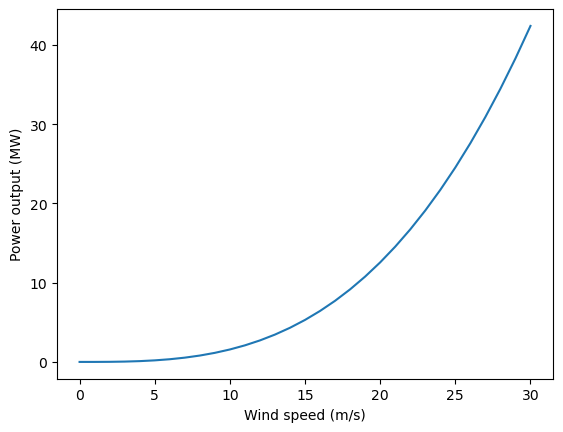

In [63]:
import matplotlib.pyplot as plt

wind_speeds_ms_stuhleck = np.arange(0, 31)
rotor_diameter_m_vestas = 100
wind_power = windturbine_simulation_mw(wind_speeds_ms_stuhleck, rotor_diameter_m_vestas)

plt.plot(wind_speeds_ms_stuhleck, wind_power)
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Power output (MW)');

You can append a third (optional) parameter to display the data points:

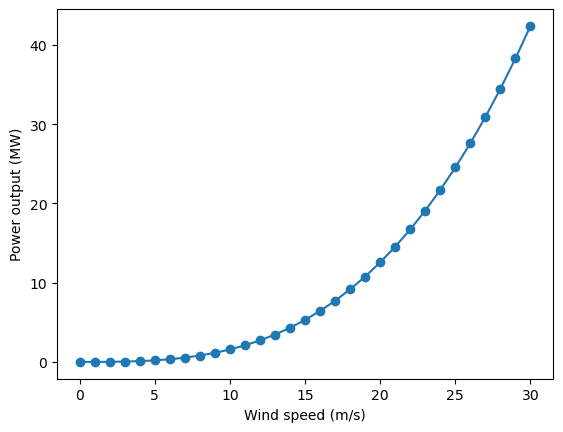

In [64]:
plt.plot(wind_speeds_ms_stuhleck, wind_power, 'o-')
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Power output (MW)');

## Exercise 5
Plot the temperature vs. simulated demand, using the function `determine_load_gw` defined above. Use temperatures in the range [-5, 35].

Bonus: also plot the temperatures from above stored in `temperatures_dc` and the corresponding loads. Ideally do this in a second cell, so it gets plotted in a different figure. You can use the parameters '-o' to show the temperatures used.

In [65]:
### BEGIN SOLUTION

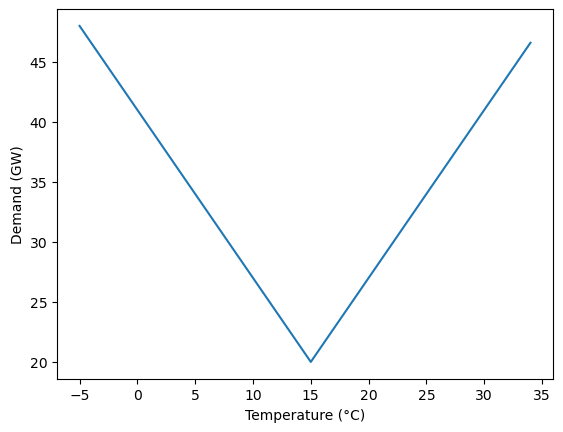

In [66]:
temperatures_range_dc = np.arange(-5, 35)
simulated_load = determine_load_gw(temperatures_range_dc)

plt.plot(temperatures_range_dc, simulated_load)
plt.xlabel('Temperature (°C)')
plt.ylabel('Demand (GW)');

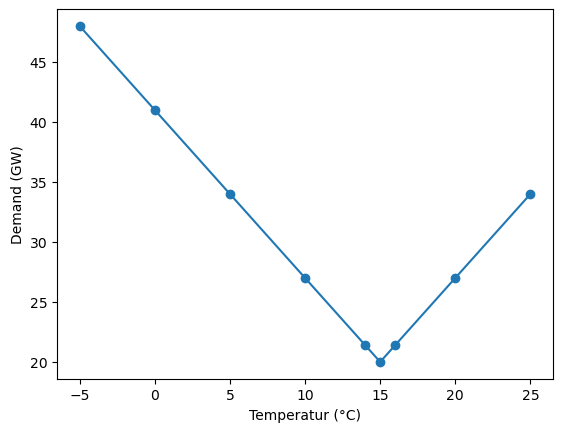

In [67]:
plt.plot(temperatures_dc, loads_gw, 'o-')
plt.xlabel('Temperatur (°C)')
plt.ylabel('Demand (GW)');

In [68]:
### END SOLUTION

<div style="color:#555;border-top:1px solid #999;text-align:right;padding:4px;">End of exercise</div>